In [41]:
# aspect 4  - fresh water analysis 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures



df = pd.read_csv("DATA/WaterContaminantsDAta.txt", sep=",")
selected_PCA = ['level_DO',"level_NH3", "level_Pb","level_SO4", "level_B1"]
selected_data_PCA = df[selected_PCA]
matrix_PCA = selected_data_PCA.to_numpy()

pca = PCA(n_components = 5)
components = pca.fit_transform(matrix_PCA)

print("Components:")
print(components)


print("Explained Variance Ratio:")
print(pca.explained_variance_ratio_)

main_component = pca.components_[0]
percentage_contribution = pca.explained_variance_ratio_[0] * 100


print("Main Principal Component:")
print(main_component)
print("Percentage Contribution to Overall Variance: {:.2f}%".format(percentage_contribution))

Components:
[[-4.77055994e+01 -3.91922657e+00  4.67661430e-01 -5.73222756e-01
  -9.27752637e-03]
 [-1.82254724e+01  6.03955333e+01  2.30455802e+00  7.80848431e-01
   7.58522834e-04]
 [-2.48012069e+01 -1.34364367e+01 -2.67059341e+00 -8.45268974e-01
   1.64371318e-03]
 ...
 [-5.01955750e+01  3.74509094e+01 -2.75826756e+00  1.12253661e+00
   5.09436937e-03]
 [-5.29188381e+01 -5.16007547e+01  2.94425642e+00  1.87333764e+00
  -6.63151722e-03]
 [ 6.13077844e+01  7.09194368e+00  7.32792679e-01  2.26217287e+00
  -1.13412149e-02]]
Explained Variance Ratio:
[7.09869484e-01 2.89154748e-01 7.36197570e-04 2.39545878e-04
 2.46066320e-08]
Main Principal Component:
[ 3.44505417e-04 -2.95036284e-06  3.24357220e-04  9.99909478e-01
 -1.34466038e-02]
Percentage Contribution to Overall Variance: 70.99%


[[    0.           598.41990593 -9276.83717141 -8582.90130693]]


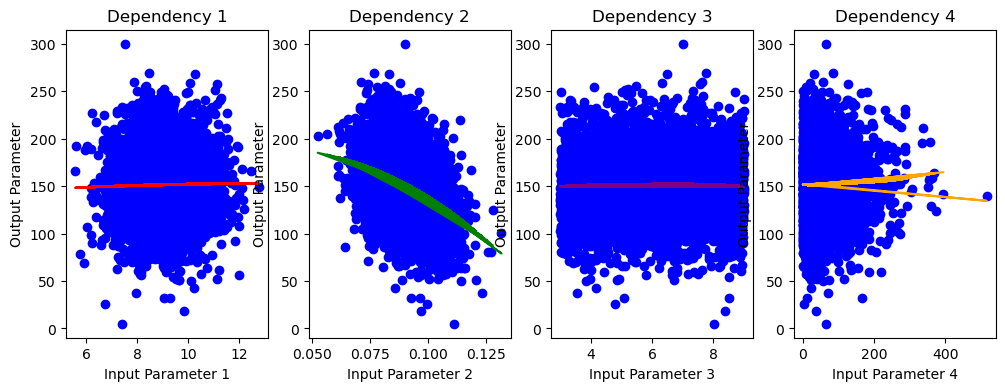

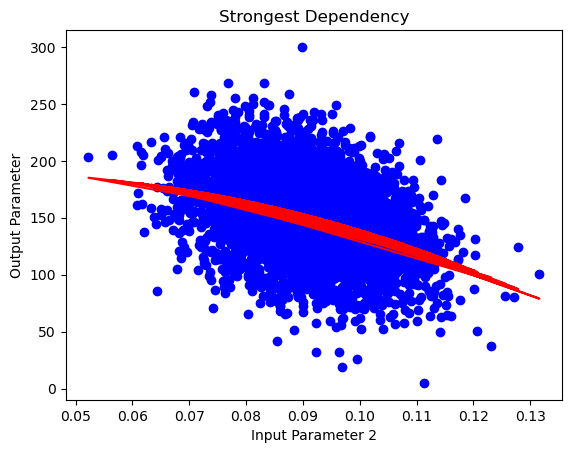

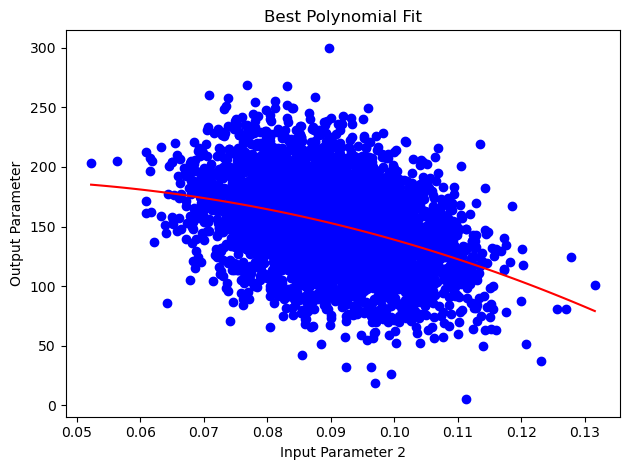

In [43]:
filtered_df = df[df['location'] == 'Z']

X = df[['level_DO',"level_NH3", "level_Pb","level_SO4"]].values

y = df.level_B2.values.reshape(-1, 1)

# Perform polynomial regression for each input parameter
regressors = []
scores = []
degrees = [2, 3, 4, 5,6]  # Degree of polynomial features

for i in range(X.shape[1]):
    poly_features = PolynomialFeatures(degree=degrees[i])
    X_poly = poly_features.fit_transform(X[:, i].reshape(-1, 1))

    regressor = LinearRegression()
    regressor.fit(X_poly, y)
    regressors.append(regressor)
    scores.append(regressor.score(X_poly, y))

# Determine the strongest dependency
strongest_dependency_idx = np.argmax(scores)
strongest_dependency_regressor = regressors[strongest_dependency_idx]
strongest_dependency_degree = degrees[strongest_dependency_idx]

# Plot all dependencies
plt.figure(figsize=(12, 4))

colors = ['red', 'green', 'purple', 'orange']
for i in range(X.shape[1]):
    plt.subplot(1, X.shape[1], i + 1)
    plt.scatter(X[:, i], y, color='blue', label='Data')

    # Generate polynomial features for the current input parameter
    poly_features = PolynomialFeatures(degree=degrees[i])
    X_poly = poly_features.fit_transform(X[:, i].reshape(-1, 1))

    plt.plot(X[:, i], regressors[i].predict(X_poly), color=colors[i], label=f'Degree {degrees[i]}')
    plt.xlabel(f'Input Parameter {i + 1}')
    plt.ylabel('Output Parameter')
    plt.title(f'Dependency {i + 1}')

# Plot the strongest dependency
plt.figure()
plt.scatter(X[:, strongest_dependency_idx], y, color='blue', label='Data')

strongest_dependency_poly_features = PolynomialFeatures(degree=strongest_dependency_degree)
strongest_dependency_X_poly = strongest_dependency_poly_features.fit_transform(X[:, strongest_dependency_idx].reshape(-1, 1))

plt.plot(X[:, strongest_dependency_idx], strongest_dependency_regressor.predict(strongest_dependency_X_poly),
         color='red', label='Line')
plt.xlabel(f'Input Parameter {strongest_dependency_idx + 1}')
plt.ylabel('Output Parameter')
plt.title(f'Strongest Dependency')

# Plot the best polynomial fit
plt.figure()
plt.scatter(X[:, strongest_dependency_idx], y, color='blue', label='Data')

X_fit = np.linspace(np.min(X[:, strongest_dependency_idx]), np.max(X[:, strongest_dependency_idx]), 100).reshape(-1, 1)
X_fit_poly = strongest_dependency_poly_features.transform(X_fit)

plt.plot(X_fit, strongest_dependency_regressor.predict(X_fit_poly), color='red', label='Best Fit')
plt.xlabel(f'Input Parameter {strongest_dependency_idx + 1}')
plt.ylabel('Output Parameter')
plt.title(f'Best Polynomial Fit')

# Display coefficients of the best fit
coefficients = strongest_dependency_regressor.coef_
print(coefficients)
# Add a legend and adjust subplot spacing
plt.tight_layout()
plt.show()
# code might be better, should be comented better. Cant seperate the colours between polynomials, so they are all stacked. but porpably still good enough to prove the point. 2 is the most signigicant one,
# lables need to be changed. PCA idk, i got numbers but thats all